In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataframe = pd.read_csv('dataset/winequality-red.csv', sep=';')
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataframe.info()
print(dataframe.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

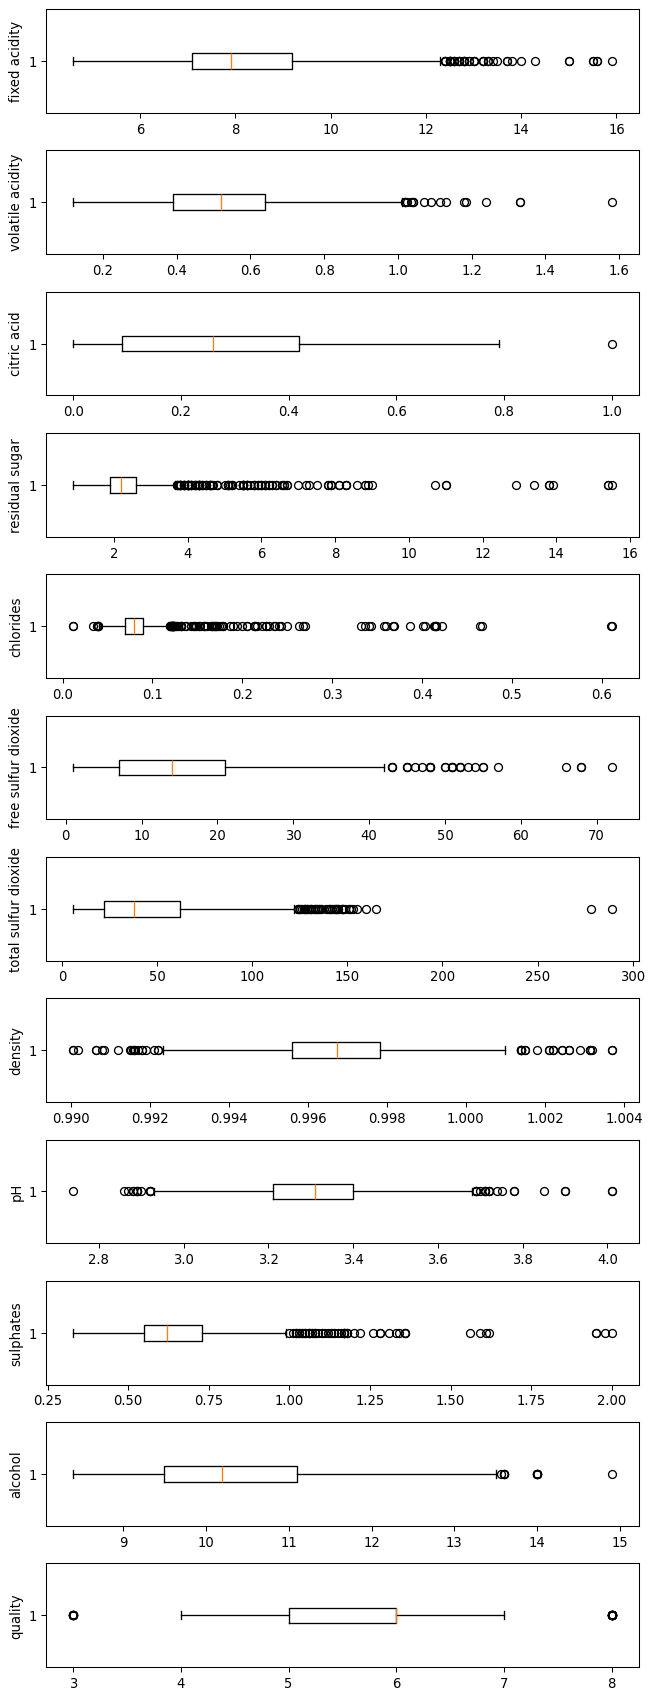

In [6]:
dataframe.describe()

fig, ax = plt.subplots(len(dataframe.columns), 1, figsize=(7,18), dpi=95)
for i, col in enumerate(dataframe.columns):
    ax[i].boxplot(dataframe[col], vert=False)
    ax[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [7]:
def remove_outliers_iqr(dataframe, columns):
    clean_df = dataframe.copy()
    for col in columns:
        q1 = clean_df[col].quantile(0.25)
        q3 = clean_df[col].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1-1.5*iqr
        upper_bound = q3-1.5*iqr

        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
        print("10000000")
        print(clean_df)
    return clean_df



In [16]:
numerical_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()

if 'quality' in numerical_cols:
        numerical_cols.remove('quality')
clean_df = remove_outliers_iqr(dataframe.drop(columns=['quality']), numerical_cols)

10000000
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
12              5.6             0.615         0.00             1.6      0.089   
34              5.2             0.320         0.25             1.8      0.103   
38              5.7             1.130         0.09             1.5      0.172   
45              4.6             0.520         0.15             2.1      0.054   
49              5.6             0.310         0.37             1.4      0.074   
...             ...               ...          ...             ...        ...   
1587            5.8             0.610         0.11             1.8      0.066   
1591            5.4             0.740         0.09             1.7      0.089   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur 

In [ ]:
# q1, q3 = np.percentile(dataframe['q'], [25, 75])
# iqr = q3 - q1
# lower = q1 - 1.5 * iqr
# upper = q3 + 1.5 * iqr
# clean_df = dataframe[(dataframe['Insulin'] >= lower) & (dataframe['Insulin'] <= upper)]